# Preprocessing of EEG data
In this notebook, we will go through the basics of preprocessing EEG data using MNE. We will be using the MNE sample data from an experiment. 

## Using this notebook
The code in this notebook is divided into cells. You can execute the code in each cell by pressing the play button (▶) in the top left, or using the shortcut Ctrl+Enter. The output of the code is shown beneath the cell.

The workflow of preprocessing is as follows:
1. Load the data
2. Exclude bad channels
3. Common average reference
4. Filtering
5. Artefact rejection
6. Epoching
7. Downsampling

After preprocessing, we average over trials to get the evoked response and plot the result.

But before beginning we need to make sure we have the python packages we need to run the analysis!

The following code chunk creates a virtual environment by running a bash script and installs the requirements specified in `requirements.txt`. In theory you only need to run this code once - as it saves all the packages in a folder called `env`. However, if you update your requirements file you need to run the code again to include new packages. 

To be able to run this code you need to press "Select Kernel" in the top right corner and install the recommended extensions. Choose a python kernel afterwards by clicking the same icon. 

In [1]:
!bash setup_env.sh

  Using cached ipykernel-6.25.2-py3-none-any.whl (154 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.3 MB/s eta 0:00:0000:010:01
  Using cached mne-1.5.1-py3-none-any.whl (7.7 MB)
  Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached Pillow-10.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (3.6 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (301 kB)
  Using cached fonttools-4.42.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
  Using cached pyzmq-25.1.1-cp310-cp3

This following code runs a bash script, that lets the jupyter kernel know that you have created a new virtual environement that you would like to be able to use. By adding this code to other notebooks, you won't have to install packages every time you start a new uCloud run.

In [2]:
!bash env_to_ipynb_kernel.sh

Installed kernelspec env in /home/ucloud/.local/share/jupyter/kernels/env


**Important!!** Before you can use the packages installed, you need to change the kernel used to run the code in this notebook. Now lets change the kernel to the one including all our installations. Press where it says "Python...." in the top right corner, then "select another kernel", then "Jupyter kernels..." and then select "env". If "env" does not show up, press the little refresh symbol! 

In [1]:
import mne
import os
import matplotlib

%matplotlib inline

## 1. Load the sample data
To begin with we load the MNE sample data. It contains data from an experiment where checkerboard patterns were presented to the subject into the left and right visual (hemi)field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.

Looking at trials across modalities (auditory/visual) we can see the contrast between auditory and visual processing, while inspecting the left/right trials allows us to observe the contralateral visual processing of the brain (i.e. what is presented to the right visual hemifield is processed in the left visual cortex and vice versa).



In [2]:
# reading the file & loading in the data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file) # raw is an MNE object that contains the data of the class Raw
raw.info['bads'] = []

raw.load_data()

Opening raw data file /home/ucloud/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

### Questions
Looking at the ouput from the load_data() function, answer the following questions:

**Q1:** How many EEG channels are there?
**A:** 

**Q2:** Were any EEG channels marked as bad during recording?
**A:**

**Q3:** What is the sampling frequency?
**A:**

**Q4:** How many minutes of data were recorded?
**A:**

**Now lets try and plot the raw data!**

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Using matplotlib as 2D backend.


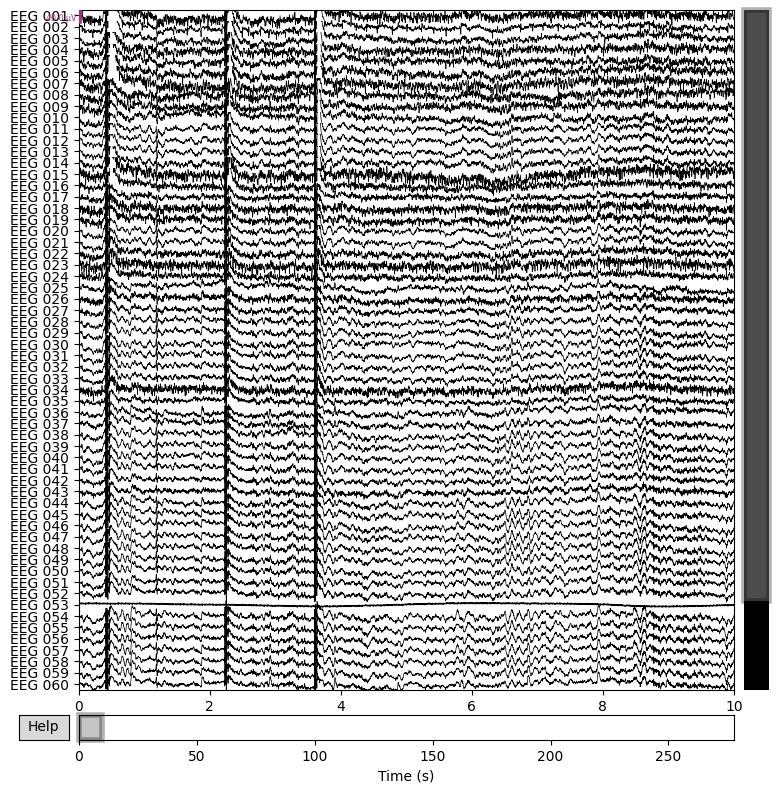

In [3]:
# selecting only EEG and stimulus data & plotting raw data
raw.pick(['eeg', 'stim'])
raw.plot(n_channels=60);

## 2. Exclude bad channels
When plotting all channels simultaneously, it is evident that one of the channels is not really picking up any signal (that is, it is flat). This is a bad channel and should be excluded from further analysis. There are other ways that channels might be bad, such as being too noisy. In this case, we will just exclude the channel that is flat.

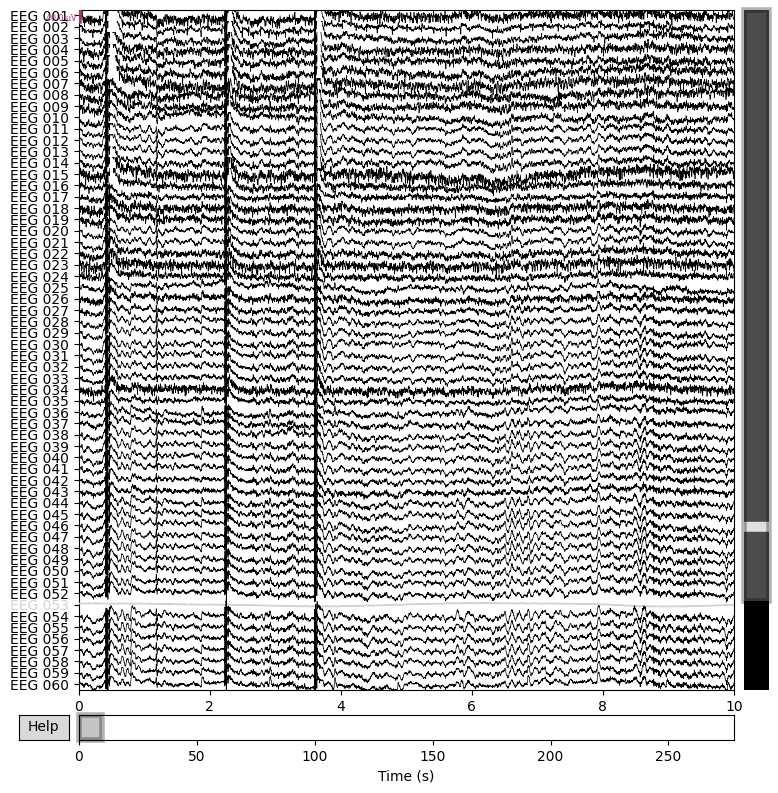

In [4]:
# Marking the channel as bad
raw.info['bads'] = ['EEG 053']

# Checking that we have marked the correct channel as bad
raw.plot(n_channels=60);

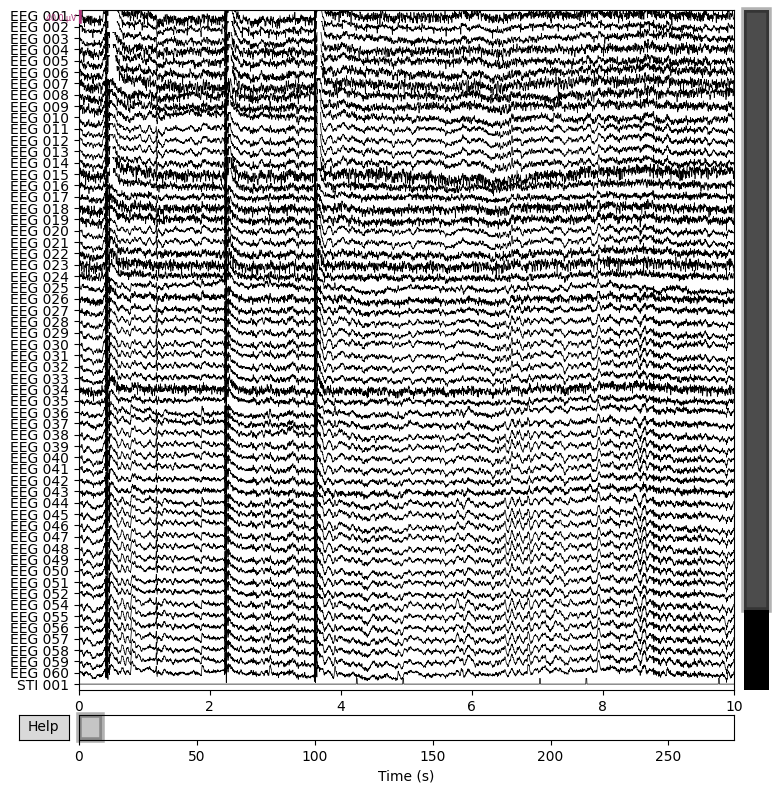

In [5]:
# removing the bad channel
raw.pick(['eeg', 'stim'], exclude='bads')

# Plotting the data again to see that the bad channel has been removed
raw.plot(n_channels=60);

## 3. Common average reference
The idea behind average reference is to compute the average of the signal at all EEG electrodes and subtract it from the EEG signal at every electrode for every time point. To set this “virtual reference” that is the average of all channels, you can use set_eeg_reference() with ref_channels='average'. This is done after excluding bad channels, so the average is computed only over the good channels.

The rationale behind this is that the average of all the potentials recorded on the whole head due to current sources inside it is zero, this would make for a quiet or electrically neutral reference. However, in practice, to achieve such an ideal reference one would require large number of electrodes that cover the whole head uniformly, which is not the case in EEG recordings where limited number of electrodes cover mostly the upper part of the head.

**IMPORTANT:** The data used here has already been referenced to the average of all channels, but this code will be needed when you analyse your own data!

In [ ]:
# common average reference
# raw.set_eeg_reference('average', projection=True)

# applying the reference
# raw.apply_proj()

## 4. Filtering
Now let's filter the data. We apply a high-pass filter at 0.1 Hz and a low-pass filter at 40 Hz, following the typical practises of EEG preprocessing. The high-pass filter minimises slow drifts in the data (e.g. scalp potentials), while the low-pass filter excludes high-frequency noise, e.g. line noise (50 Hz or 60 Hz) or EMG (muscle-related artefacts), with frequencies higher than the frequencies of the signal we are interested in.

**NOTE** MÅSKE FOR TEKNISK???

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 19821 samples (33.001 s)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 199 samples (0.331 s)



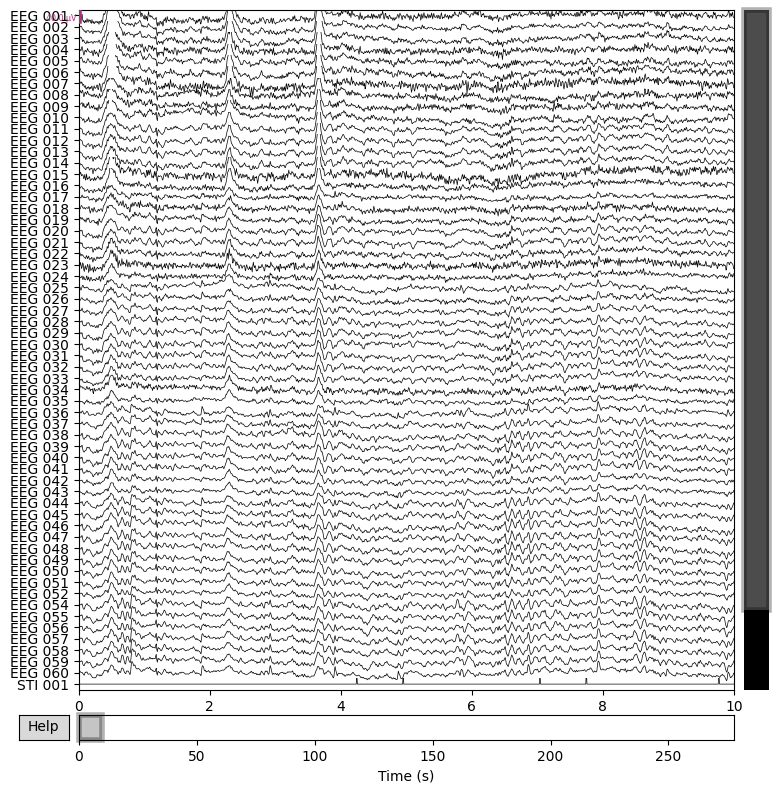

In [6]:
# high-pass filtering the data at 0.1 Hz and subsequently low-pass filtering at 40 Hz
raw = raw.filter(0.1, None)
raw = raw.filter(None, 40)

# plotting the filtered data for inspection
raw.plot(n_channels=60);

### Questions
**Q5:** If you compare the raw data with the filtered data, what differences do you see?
**A:**

## 5. Artefact rejection
Not all noise is outside the frequency range of brain activity and can therefore not just be suppressed by filtering. Some artefacts, like eye blinks, comprise large jumps in activity. Since such large shifts are unlikely to be related to brain activity, we can exclude parts of the recording where this happens. We do this by selecting a threshold value for the peak-to-peak amplitude. When we epoch our data, we exclude epochs that contain "jumps" of more than ±150 microvolts in the signal, i.e. epochs where the subject likely blinked.

In [7]:
# rejecting everything over or under a threshold of 150 microvolts
# anything above or belove this threshold is likely not brain activity but artefacts

# for now we are just defining the threshold, we will apply it later when we are creating epochs
reject = dict(eeg=150e-6)

## 6. Epoching
Now that the data has been preprocessed, we can epoch the data. Epoching is the process of cutting the continuous data into smaller segments, called epochs. Each epoch is a time window of the data, centered around an event of interest.

To begin with we find the events that were recorded during the experiment. 

In [8]:
# this function locates any stimulus events in the recording (e.g. presentation of stimuli or button presses)
events = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


In [9]:
# we can make a dictionary of what the event IDs represent
# by using '/' we can actually later index one dimension *across* the other, i.e. if we just write 'left' we get all events presented to the left side, both auditory and visual
event_id = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              'smiley': 5,
              'button': 32
              }

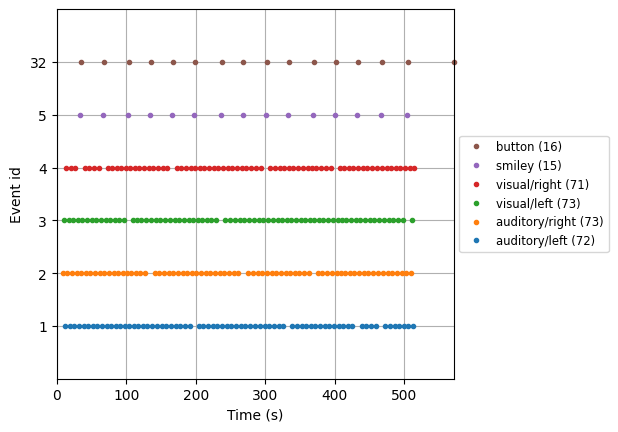

In [10]:
# plotting the events
mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);

We can identify the timepoints during the recording where both visual and auditory stimuli were presented, as well as when the subject was presented with a smiley and responded with a button press. Since we are interested in the presentation of stimuli, we create our epochs around these events. The time window we establish span from 0.2 seconds before stimulus onset to 0.5 seconds after stimulus onset. The 200 milliseconds before the onset of the stimulus enables us to establish a baseline of "no activity", i.e. without stimulus presentation, which we can subtract from our time window with activity in order subtract away the background activity. The 500 milliseconds after the stimulus onset denote the time in which we expect the effect to occur, since the relevant EEG components for this kind of task arise within 500 milliseconds of stimulus onset. 

In [11]:
# establishing time window
tmin, tmax = -0.2, 0.5

In [12]:
# creating the epochs using the variables created in the cell above, and timelocking to the events
# baseline time interval spans from beginning of the data (-0.2 s) to 0 s (stimulus onset)
# we use the reject variable we created earlier in order to remove artefacts
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=["eeg"],
                    baseline=(None, 0), reject=reject, preload=True)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 421 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 006', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 006', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 

As you can see, we are dropping some epochs that were deeemed 'bad' because they contain peak-to-peak values over the threshold we defined, allowing us to exclude epochs with artefacts in order to try to keep as much noise out of our data as possible.

## 7. Down sampling
To reduce the amount of data we have to work with as well as the amount of time it takes to run the analysis the data is downsampled. This is done after creating the epochs, as doing so before can potentially mess with the precision of the extraction of epochs.

In [13]:
# downsampling to 250 Hz
epochs_resampled = epochs.resample(250)

## 8. Analysis (Event related potentials)
We can now average over epochs across our modalities (auditory/visual) and take a look at whether there seems to be a difference between our conditions when we average out the noise from individual trials.

In [14]:
# now the '/' used in the event IDs comes in handy! To get all epochs with auditory stimuli, we can index 'auditory' across the left/right dimension (and 'visual', of course)
# that way we don't have to specify 'auditory_left' and 'auditory_right' etc.
aud_epochs = epochs_resampled['auditory']
vis_epochs = epochs_resampled['visual']

# creating evokeds for auditory condition by averaging over epochs
aud_evoked = aud_epochs.average()

# creating evokeds for visual condition
vis_evoked = vis_epochs.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


combining channels using "gfp"
combining channels using "gfp"


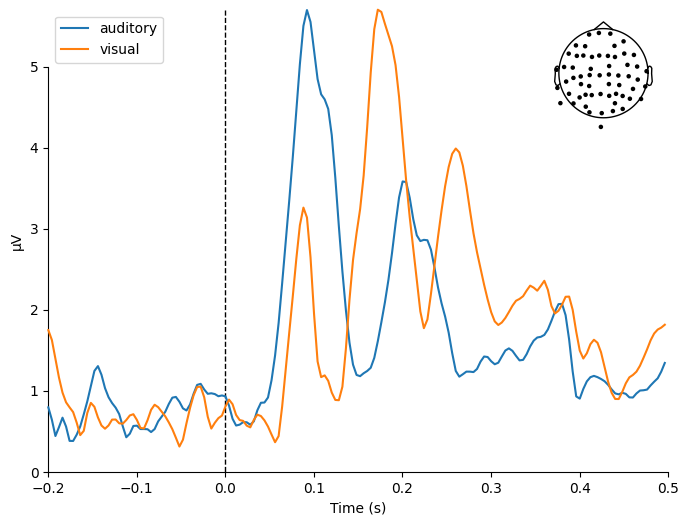

In [15]:

# comparing the two conditions
mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right');